Tugas Kelompok 1

*   I Gede Ariawan Eka Putra 1908561085
*   Kevin Moses Waleleng, 2108561100



In [ ]:
!pip install praw

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 191.0/191.0 kB 2.9 MB/s eta 0:00:00


In [ ]:
import praw
import csv
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import re

# Data Preprocessing
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string

# Feature Extraction
from sklearn.feature_extraction.text import TfidfVectorizer

# Word Embedding
from gensim.models import Word2Vec
import gensim.downloader as api

# Clustering
from sklearn.metrics import silhouette_score
from sklearn.model_selection import ParameterGrid
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import tqdm

# visualisasi kata
from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
reddit = praw.Reddit(
    client_id='PTWqzreeXBM1Y44pt1kLyA',
    client_secret='A5SP8SrVpB0jZMBsswDqfHlAbz-NQQ',
    user_agent='YOUR_APP_NAME'
)

subreddit_names = ['depression', 'mentalhealth', 'Anxiety', 'SuicideWatch']

all_data = []

for subreddit_name in subreddit_names:
    subreddit = reddit.subreddit(subreddit_name)
    subreddit_posts = subreddit.hot(limit=None)

    for post in subreddit_posts:
        post_data = {
            'title': post.title,
            'content': post.selftext,
            'score': post.score
        }
        all_data.append(post_data)

csv_file_name = 'depression_data.csv'

with open(csv_file_name, mode='w', newline='', encoding='utf-8') as file:
    fieldnames = ['title', 'content', 'score']
    writer = csv.DictWriter(file, fieldnames=fieldnames)

    writer.writeheader()

    for post_data in all_data:
        writer.writerow(post_data)

print(f'Data from multiple subreddits has been saved to {csv_file_name}')

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/l

Data from multiple subreddits has been saved to depression_data.csv


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/sains_data/depression_data.csv")
data

title  \
0     Our most-broken and least-understood rules is ...   
1     Regular check-in post, with information about ...   
2                     Mental health care is gaslighting   
3     I once had a therapist straight up tell me "I ...   
4            Im fucking suffering and no one notices me   
...                                                 ...   
3807                                      I feel shitty   
3808  Rope around my neck and I’m standing on a chai...   
3809                      To blow my fucking brains out   
3810                     I don’t know how to handle it.   
3811                               I think it's my time   

                                                content  score  
0     We understand that most people who reply immed...   2365  
1     Welcome to /r/depression's check-in post - a p...     10  
2     The way we live isn't normal. Needing anti dep...    277  
3     I've been having mental health issues for a wh...     85  
4     No one ever has noticed me. I cried at the bus...     46  
...                                                 ...    ...  
3807  I used to be friends with a girl 2 years ago I...      1  
3808                                                NaN      1  
3809  I want to  die I want to die I doent know if I...      2  
3810  I’ve made a plan for about 3 weeks time and I’...      1  
3811  I thought I would be strong enough to cope wit...      2  

[3812 rows x 3 columns]

In [ ]:
# count NaN value
data.isna().sum()

title       0
content    72
score       0
dtype: int64

Total dataset 3811, dengan content memiliki isi yang kosong sebanyak 72 dokumen. Untuk itu akan dilakukan drop row apabila terdapat content yang kosong. Sekitar 1,889% content yang hilang dari total keseluruhan

In [ ]:
# drop nan data
data = data.dropna(subset=['content']).reset_index(drop=True)

In [ ]:
#Hasil drop data
data.isna().sum()

title      0
content    0
score      0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3740 entries, 0 to 3739
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    3740 non-null   object
 1   content  3740 non-null   object
 2   score    3740 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 87.8+ KB


In [ ]:
print(data.shape)

(3740, 3)


Dalam eksplorasi dataset, terdapat 3 jenis kolom, dimana title dan content berisi string dan menjelaskan cerita depresi dari pengguna Reddit. Sedangkan, score adalah jumlah pengguna Reddit yang upvote cerita dari pengguna tersebut.

Semakin tinggi nilai score, maka semakin banyak orang yang menyetujui/relate/mengundang orang lain untuk membaca cerita tersebut

In [ ]:
data.describe()

score
count  3740.000000
mean      8.044385
std      60.149588
min       0.000000
25%       1.000000
50%       1.000000
75%       3.000000
max    2365.000000

Berdasarkan informasi dari kolom score, rata-rata score dari cerita tersebut adalah 8, standar deviasi yaitu 60 dan nilai max 2365, min 0

# Visualitaion Data

Fokus pada score adalah pada standar deviasi yang tinggi. Standar deviasi yang tinggi menunjukkan cerita yang unik dan berbagai macam. Bagi cerita yang memiliki dampak/relate/menarik bagi pembaca yang lain, akan memberikan score. Sehingga, score yang rendah bisa termasuk dalam outlier, dikarenakan dataset yang bercerita tentang cerita depresi yang bervariasi dari berbagai macam pengguna, jika tidak menarik/tidak memiliki cerita yang lengkap, pengguna bisa tidak memberikan score

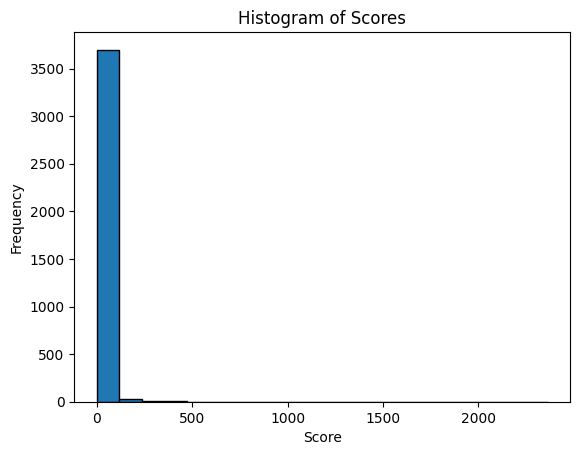

In [ ]:
plt.hist(data['score'], bins=20, edgecolor='k')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.title('Histogram of Scores')
plt.show()

<ipython-input-12-d0bcc4241e53>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['score'], shade=True)


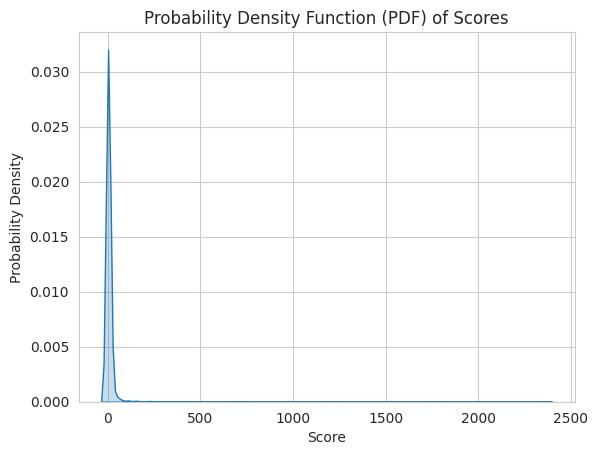

In [ ]:
sns.set_style("whitegrid")
sns.kdeplot(data['score'], shade=True)
plt.xlabel('Score')
plt.ylabel('Probability Density')
plt.title('Probability Density Function (PDF) of Scores')
plt.show()

Grafik menunjukkan skewness ke kiri artinya, dataset berfokus pada cerita yang tidak memiliki score/engagement yang tinggi dari pengguna lain.

Apakah terdapat karakteristik dari cerita yang membuat pengguna lain tertarik atau tidak?

Dataset akan terbagi menjadi 2 :

Dataset dengan highly engaged (score >= threshold)
Dataset dengan weakly engaged (score < threshold)
Threshold ditentukan dengan pemanfaatan standard deviasi dan mean. Formula : threshold = mean_score + 2 * std_deviation

Jika score lebih dari 2 kali standar deviasi ditambah rata-rata keseluruhan score, maka akan termasuk dataset highly engaged. Selain itu akan masuk ke weakly engaged

## Check Outlayer

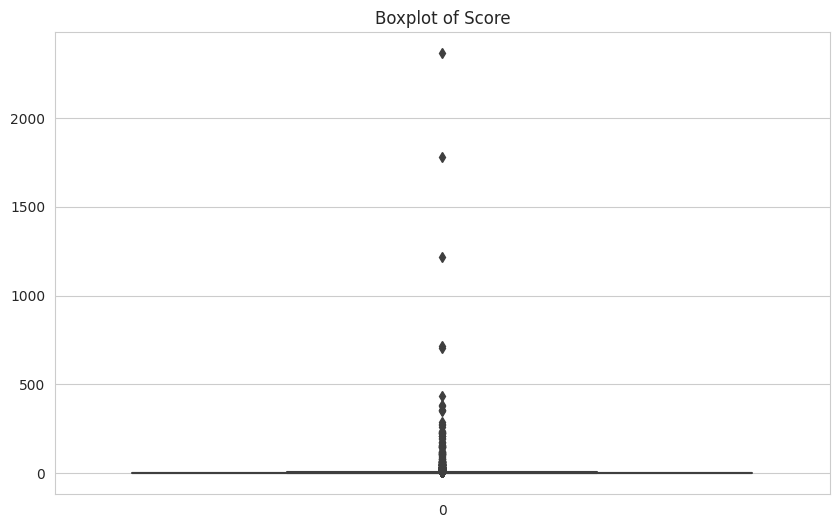

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data['score'])
plt.title('Boxplot of Score')
plt.show()

In [ ]:
negative_or_zero_scores = data[data['score'] <= 0].shape[0]
negative_or_zero_scores

74

In [ ]:
offset = np.abs(data['score'].min()) + 1
data['score'] = np.log(data['score'] + offset)

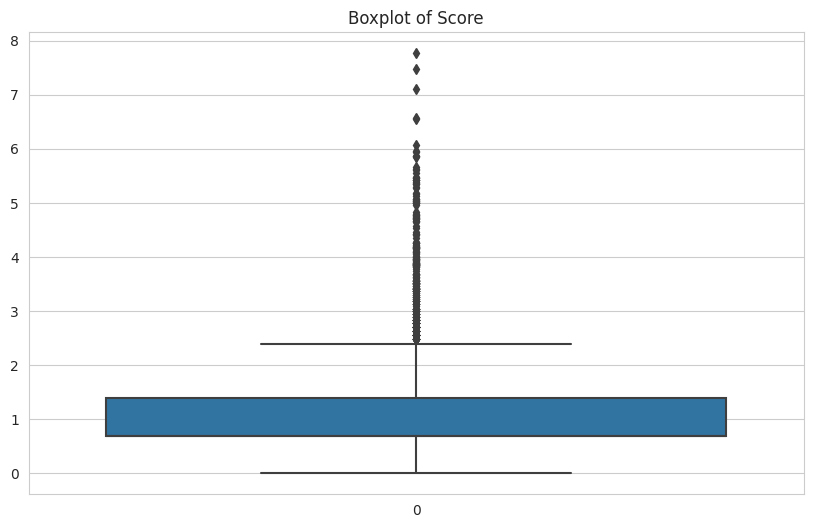

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data['score'])
plt.title('Boxplot of Score')
plt.show()

In [ ]:
# Mengitung mean dan std dari score
mean_score = data['score'].mean()
std_deviation = data['score'].std()

# Set threshold
threshold = mean_score + 2 * std_deviation

high_data = data[data['score'] >= threshold]
weak_data = data[data['score'] < threshold]

## Grafik High Engaged Dataset

<ipython-input-18-2adc7c08e295>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(high_data['score'], shade=True)


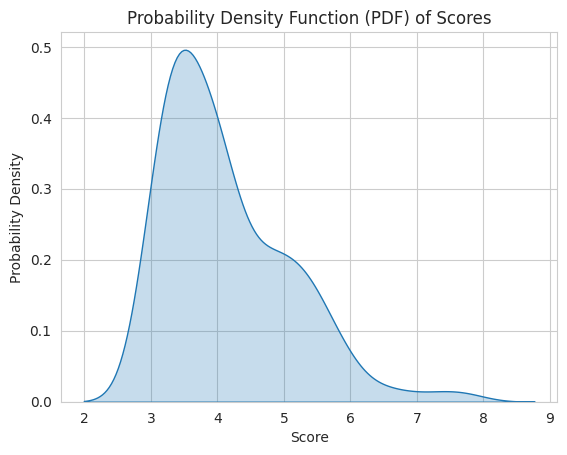

In [ ]:
sns.set_style("whitegrid")
sns.kdeplot(high_data['score'], shade=True)
plt.xlabel('Score')
plt.ylabel('Probability Density')
plt.title('Probability Density Function (PDF) of Scores')
plt.show()

## Grafik Weak Engaged Dataset

<ipython-input-19-898aa3247ce1>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(weak_data['score'], shade=True)


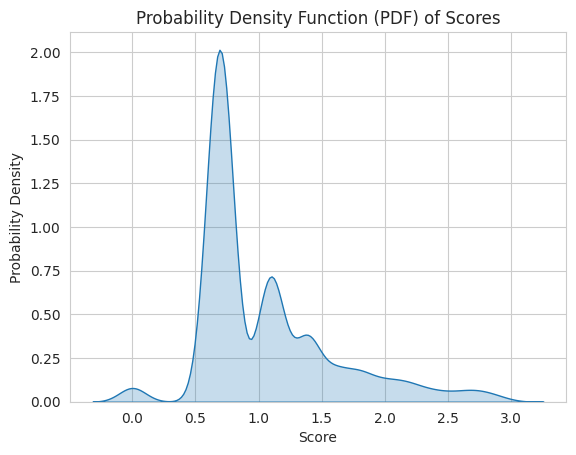

In [ ]:
sns.set_style("whitegrid")
sns.kdeplot(weak_data['score'], shade=True)
plt.xlabel('Score')
plt.ylabel('Probability Density')
plt.title('Probability Density Function (PDF) of Scores')
plt.show()

# Data Preparation

In [ ]:
def preprocess_text(text):
    text = re.sub(r'(\\x[0-9a-fA-Z]{2})', '', text)
    # Remove URL
    text = re.sub(r'https?://\S+|www\.\S+', ' ', text)

    # Remove Mentions
    text = re.sub(r'@\w+', ' ', text)

    # Remove Punctuation, Digits, Symbols
    text = re.sub(r'[^\w\s]|[\d_]', ' ', text)

    # Remove HTML tags
    text = re.sub(r'<.*?>', ' ', text)

    # Remove Hashtags
    text = re.sub(r'#\w+', ' ', text)

    # Convert text to lowercase
    text = text.lower()

    # Tokenize the text
    words = word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]

    # Lemmatize the words
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]

    # Join the words back into a single string
    preprocessed_text = ' '.join(words)

    return preprocessed_text

In [ ]:
high_data['clean_text'] = high_data['content'].apply(preprocess_text)
weak_data['clean_text'] = weak_data['content'].apply(preprocess_text)

<ipython-input-21-204699e1d56a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_data['clean_text'] = high_data['content'].apply(preprocess_text)
<ipython-input-21-204699e1d56a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weak_data['clean_text'] = weak_data['content'].apply(preprocess_text)


In [ ]:
high_data.head()

title  \
0  Our most-broken and least-understood rules is ...   
2                  Mental health care is gaslighting   
3  I once had a therapist straight up tell me "I ...   
4         Im fucking suffering and no one notices me   
5                                Aging is depressing   

                                             content     score  \
0  We understand that most people who reply immed...  7.768956   
2  The way we live isn't normal. Needing anti dep...  5.627621   
3  I've been having mental health issues for a wh...  4.454347   
4  No one ever has noticed me. I cried at the bus...  3.850148   
5  The feeling of your youth slipping away sucks ...  3.688879   

                                          clean_text  
0  understand people reply immediately op invitat...  
2  way live normal needing anti depressant functi...  
3  mental health issue seen several therapist psy...  
4  one ever noticed cried bus stop today literall...  
5  feeling youth slipping away suck as help think...

## Ekstrak Fiktur

In [ ]:
data['title_length'] = data['title'].apply(len)
data['content_length'] = data['content'].apply(len)
data['title_word_count'] = data['title'].apply(lambda x: len(x.split()))
data['content_word_count'] = data['content'].apply(lambda x: len(x.split()))
data[['title_length', 'content_length', 'title_word_count', 'content_word_count']].head()

title_length  content_length  title_word_count  content_word_count
0           144            4792                25                 771
1            65            2646                10                 413
2            33             638                 5                 118
3            61             433                13                  79
4            42             330                 8                  66

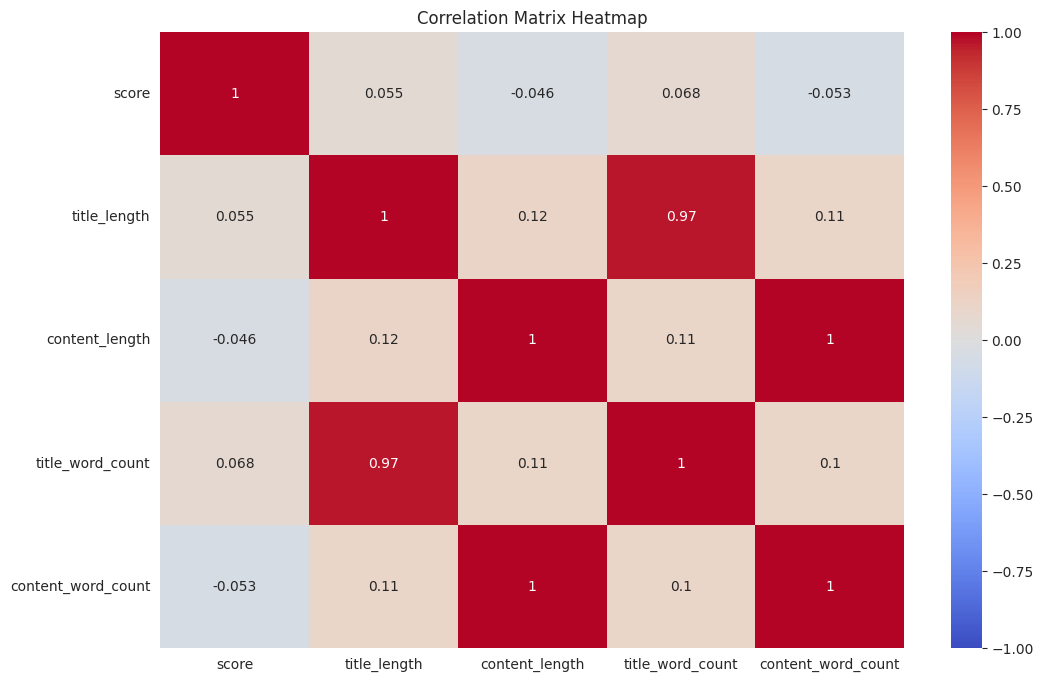

In [ ]:
# matrix
correlation_matrix = data[['score', 'title_length', 'content_length', 'title_word_count', 'content_word_count']].corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()

##Word Cloud
Untuk mengetahui setelah di preprocess text, apa saja yang dibahas didalamnnya

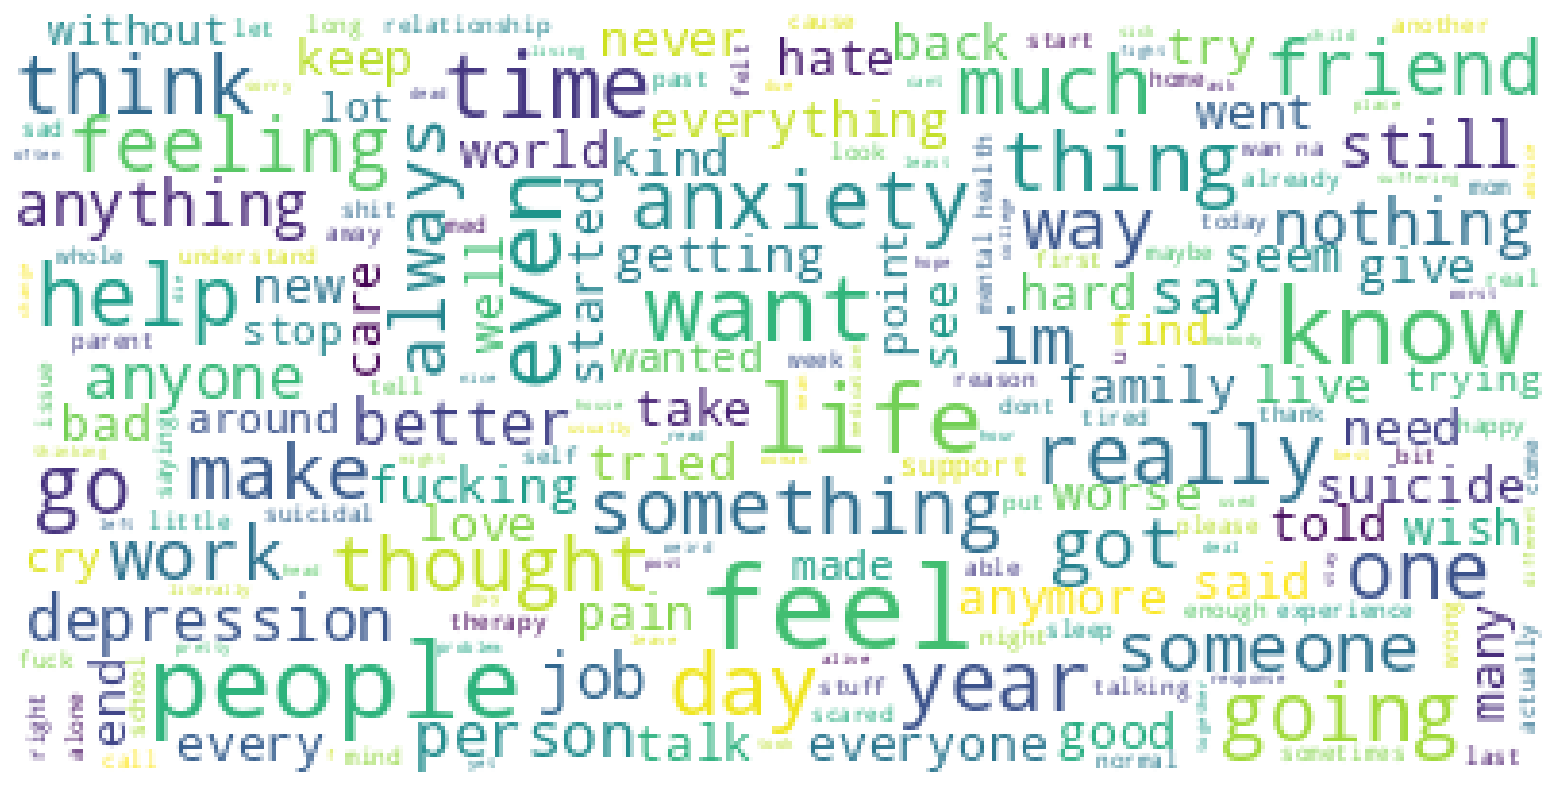

In [ ]:
text = " ".join([x for x in high_data['clean_text']])
wordcloud = WordCloud(max_font_size=30,background_color ='white').generate(text)

# Display the generated image:
plt.figure(figsize= [20,10])
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

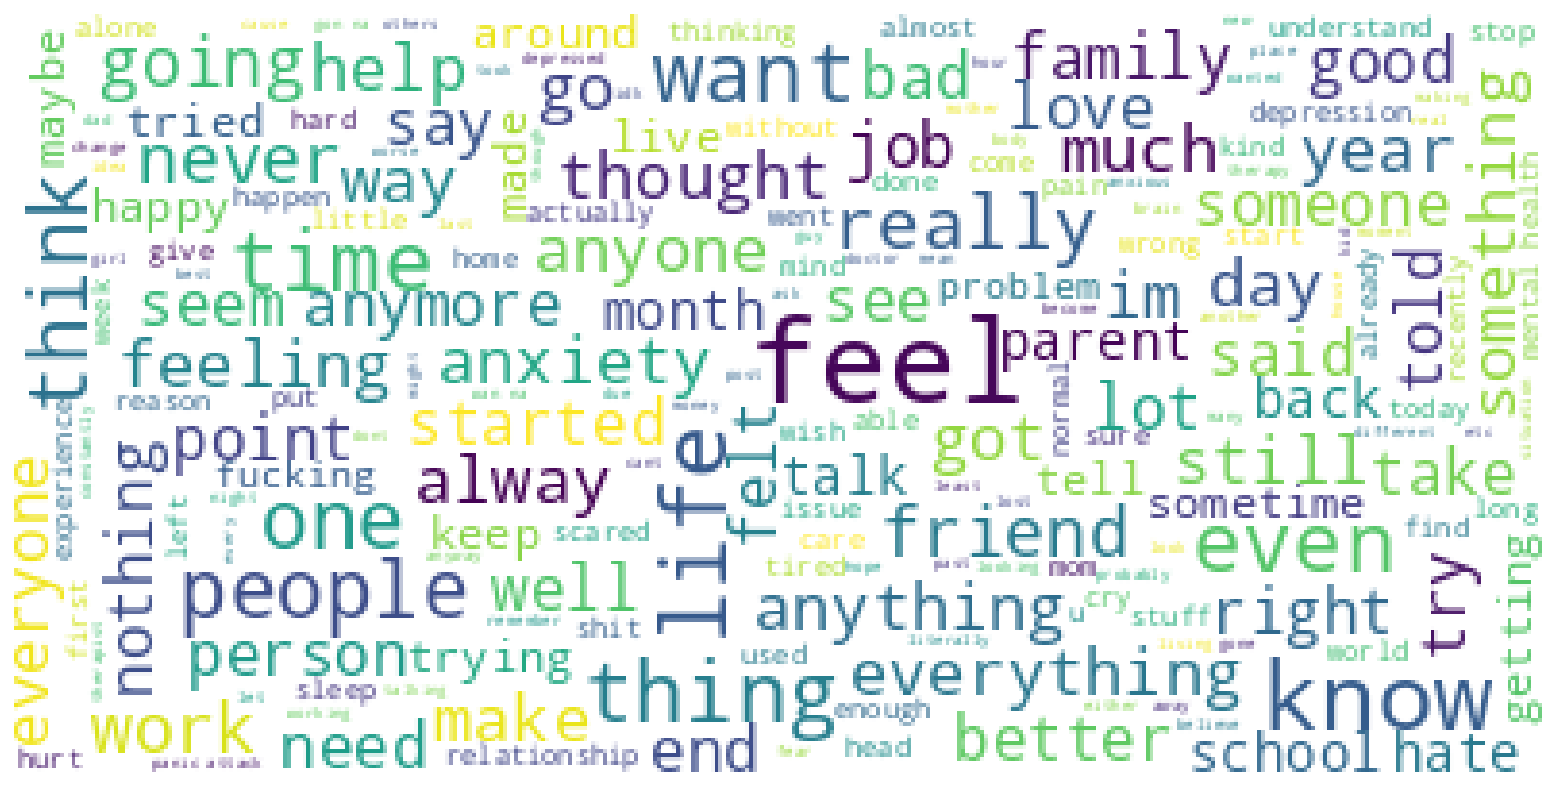

In [ ]:
text = " ".join([x for x in weak_data['clean_text']])
wordcloud = WordCloud(max_font_size=30,background_color ='white').generate(text)

# Display the generated image:
plt.figure(figsize= [20,10])
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## Ekstraksi Kata Kunci

Untuk melakukan fokus pada dataset, dilakukan ekstraksi kata kunci yang akan dijadikan bahan analisis lebih lanjut yang lebih berfokus pada kedua dataset menggunakan TF-IDF

In [ ]:
docs_high = high_data['clean_text'].to_list()
docs_high

['understand people reply immediately op invitation talk privately mean help type response usually lead either disappointment disaster usually work quite differently say pm anytime casual social context huge admiration appreciation goodwill good citizenship many support others flag inappropriate content even know many struggling hard work behind scene information resource make easier give get quality help small start new wiki page explains detail much better respond public comment least gotten know someone maintained r depression wiki private contact full text current version summary anyone acting helper invite accepts private contact e pm chat kind offsite communication early conversion showing either bad intention bad judgement either way unwise trust pm anytime seems like kind generous offer might perfectly well meaning unless solid rapport established wise idea point consider offer accept invitation communicate privately posting supportive reply publicly help people op response goo

###Keyword High Engaged Dataset

In [ ]:
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(docs_high)

In [ ]:
# Get feature names (terms)
feature_names = tfidf_vectorizer.get_feature_names_out()

# Extract keywords with the highest TF-IDF scores for each document
n_keywords = 5  # Number of top keywords to extract for each document

keywords = []
for i in range(len(docs_high)):
    # Sort the TF-IDF scores for the current document
    tfidf_scores = tfidf_matrix[i, :].toarray()[0]
    top_keyword_indices = tfidf_scores.argsort()[-n_keywords:][::-1]

    # Get the top keywords
    top_keywords = [feature_names[idx] for idx in top_keyword_indices]

    # Join the keywords into a single string
    keywords.append(', '.join(top_keywords))

# Add the Keywords column to the DataFrame
high_data['Keywords'] = keywords

<ipython-input-29-3d2e8ca416fc>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_data['Keywords'] = keywords


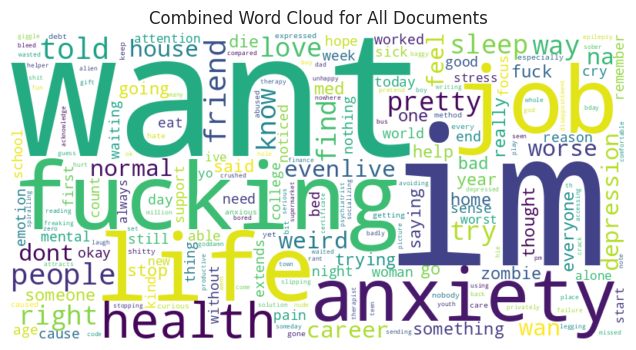

In [ ]:
# Combine all keywords into a single string
combined_keywords = ', '.join(keywords)

# Generate a word cloud from the combined keywords
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_keywords)

# Display the word cloud
plt.figure(figsize=(8, 4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Combined Word Cloud for All Documents')
plt.axis('off')
plt.show()

###Keyword Weak Engaged Dataset

In [ ]:
docs_weak = weak_data['clean_text'].to_list()

In [ ]:
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(docs_weak)

In [ ]:
# Get feature names (terms)
feature_names = tfidf_vectorizer.get_feature_names_out()

# Extract keywords with the highest TF-IDF scores for each document
n_keywords = 5  # Number of top keywords to extract for each document

keywords = []
for i in range(len(docs_weak)):
    # Sort the TF-IDF scores for the current document
    tfidf_scores = tfidf_matrix[i, :].toarray()[0]
    top_keyword_indices = tfidf_scores.argsort()[-n_keywords:][::-1]

    # Get the top keywords
    top_keywords = [feature_names[idx] for idx in top_keyword_indices]

    # Join the keywords into a single string
    keywords.append(', '.join(top_keywords))

# Add the Keywords column to the DataFrame
weak_data['Keywords'] = keywords

<ipython-input-33-bacd9bb04895>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weak_data['Keywords'] = keywords


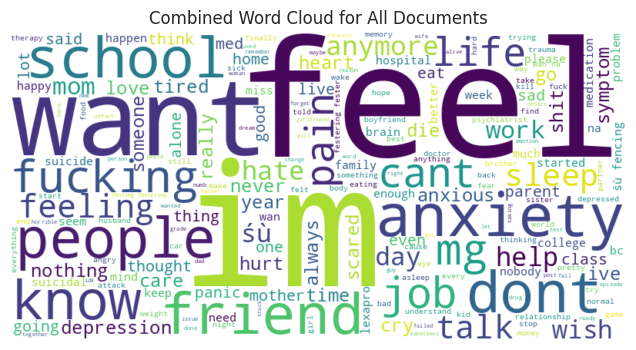

In [ ]:
# Combine all keywords into a single string
combined_keywords = ', '.join(keywords)

# Generate a word cloud from the combined keywords
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_keywords)

# Display the word cloud
plt.figure(figsize=(8, 4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Combined Word Cloud for All Documents')
plt.axis('off')
plt.show()

##Word Embedding dengan word2vec

In [ ]:
high_data

title  \
0     Our most-broken and least-understood rules is ...   
2                     Mental health care is gaslighting   
3     I once had a therapist straight up tell me "I ...   
4            Im fucking suffering and no one notices me   
5                                   Aging is depressing   
...                                                 ...   
3650                     Incredible hate for this world   
3656  I'm actually very fucking tired of my psychiat...   
3673     My fiancé just told me he doesn’t want to live   
3674                          Tonight may be the night.   
3685  Im feeling suicidal and im planning to kill my...   

                                                content     score  \
0     We understand that most people who reply immed...  7.768956   
2     The way we live isn't normal. Needing anti dep...  5.627621   
3     I've been having mental health issues for a wh...  4.454347   
4     No one ever has noticed me. I cried at the bus...  3.850148   
5     The feeling of your youth slipping away sucks ...  3.688879   
...                                                 ...       ...   
3650  Even slightest things make me very upset. Ever...  4.204693   
3656  My shrink seems so careless like superficial a...  3.295837   
3673  Ok- early this morning (1-2am) neither of us c...  3.401197   
3674  My 2 beautiful daughters will miss me but will...  3.367296   
3685  im in my new job for 2 weeks now and i hate it...  3.401197   

                                             clean_text  \
0     understand people reply immediately op invitat...   
2     way live normal needing anti depressant functi...   
3     mental health issue seen several therapist psy...   
4     one ever noticed cried bus stop today literall...   
5     feeling youth slipping away suck as help think...   
...                                                 ...   
3650  even slightest thing make upset everything dis...   
3656  shrink seems careless like superficial as bull...   
3673  ok early morning neither u could sleep laid ta...   
3674  beautiful daughter miss better life mine tried...   
3685  im new job week hate hate working general choi...   

                                               Keywords  
0                 pm, helper, health, mental, privately  
2                       million, normal, buy, way, sick  
3          psychiatrist, therapist, seen, try, epilepsy  
4                noticed, fucking, bus, compared, alien  
5                   youth, missed, slipping, wasted, as  
...                                                 ...  
3650  everything, alright, slightest, disgusting, st...  
3656        med, fucking, dosage, superficial, complain  
3673                    said, start, little, live, know  
3674             deeper, miss, grandmother, ahead, debt  
3685                   job, working, im, hate, everyone  

[183 rows x 5 columns]

In [ ]:
weak_data

title  \
1     Regular check-in post, with information about ...   
11                 I feel like I have no one to talk to   
12                                 goodbye, and thank u   
13                                    I'm Shutting Down   
14                                   Fatherless is hard   
...                                                 ...   
3735  I just had a therapy session and I sent her a ...   
3736                                      I feel shitty   
3737                      To blow my fucking brains out   
3738                     I don’t know how to handle it.   
3739                               I think it's my time   

                                                content     score  \
1     Welcome to /r/depression's check-in post - a p...  2.397895   
11    I feel so lonely.  I'm severely depressed.  Th...  2.397895   
12    serious post\r  \n\r  \nthats probably my last...  1.791759   
13    I don't want to go to work anymore. I gave in ...  2.564949   
14    \nI grow up with my mother,younger brother, yo...  1.386294   
...                                                 ...       ...   
3735  I just need to put it somewhere…\n\nTW: SI and...  1.098612   
3736  I used to be friends with a girl 2 years ago I...  0.693147   
3737  I want to  die I want to die I doent know if I...  1.098612   
3738  I’ve made a plan for about 3 weeks time and I’...  0.693147   
3739  I thought I would be strong enough to cope wit...  1.098612   

                                             clean_text  \
1     welcome r depression check post place take mom...   
11    feel lonely severely depressed thing going goo...   
12    serious post thats probably last night around ...   
13    want go work anymore gave two week notice coup...   
14    grow mother younger brother youger sister smal...   
...                                                 ...   
3735  need put somewhere tw si sh journal entry reac...   
3736  used friend girl year ago liked almost dated s...   
3737  want die want die doent know bring pull trigge...   
3738  made plan week time pretty set stone moment su...   
3739  thought would strong enough cope loss hope ok ...   

                                         Keywords  
1             rule, post, support, peer, guidance  
11         lonely, hardly, severely, ugly, inside  
12               goodbye, late, messege, smt, lil  
13           want, shutting, anymore, ignore, lay  
14                mom, grow, hard, lookup, youger  
...                                           ...  
3735                 wrote, say, send, sign, help  
3736               wan, na, hangout, dated, reply  
3737                pant, rip, needle, bring, kdf  
3738  guilt, leaving, tailbone, donate, sincerity  
3739           hope, forgive, loss, write, strong  

[3557 rows x 5 columns]

In [ ]:
def build_corpus(data):
    corpus = []
    for sentence in data.iteritems():
        keyword_string = sentence[1]
        # Split the comma-separated keywords and remove leading/trailing whitespace
        keywords = [keyword.strip() for keyword in keyword_string.split(",")]
        corpus.append(keywords)
    return corpus

In [ ]:
corpus_high = build_corpus(high_data['Keywords'])
corpus_weak = build_corpus(weak_data['Keywords'])
corpus_high

NameError: ignored

In [ ]:
corpus_weak

[['rule', 'post', 'support', 'peer', 'guidance'],
 ['lonely', 'hardly', 'severely', 'ugly', 'inside'],
 ['goodbye', 'late', 'messege', 'smt', 'lil'],
 ['want', 'shutting', 'anymore', 'ignore', 'lay'],
 ['mom', 'grow', 'hard', 'lookup', 'youger'],
 ['never', 'change', 'confront', 'dreaming', 'fire'],
 ['ideation', 'suicidal', 'risk', 'low', 'shouldve'],
 ['cry', 'depression', 'ailment', 'actually', 'start'],
 ['runt', 'loophole', 'get', 'withdrawing', 'daunting'],
 ['art', 'doubt', 'supposed', 'brain', 'unnecessary'],
 ['wand', 'hustle', 'scam', 'magic', 'stick'],
 ['searching', 'still', 'worthless', 'failure', 'depression'],
 ['intention', 'appreciate', 'answer', 'told', 'good'],
 ['much', 'porn', 'girlfriend', 'staving', 'genitalia'],
 ['suffercating', 'strangled', 'static', 'apathetic', 'color'],
 ['pc', 'rely', 'lot', 'golf', 'mother'],
 ['mandatory', 'military', 'im', 'join', 'thinking'],
 ['grade', 'im', 'dont', 'fine', 'get'],
 ['fair', 'arm', 'way', 'older', 'reach'],
 ['uncomfo

In [ ]:
from gensim.models import Word2Vec
high_model = Word2Vec(corpus_high, vector_size=100, min_count=1)
weak_model = Word2Vec(corpus_weak, vector_size=100, min_count=1)

#Clustering

Klasterisasi akan menggunakan KMeans pada keyword yang telah diekstraksi pada kedua dataset yang berbeda untuk lebih jelas melihat pengelompokkan dari masing-masing pembahasannya.

Namun, sebelum melakukan klasterisasi, pengubahan kata menjadi vektor akan menggunakan word2vec. Selanjutnya akan dilakukan penentuan klaster menggunakan siluet skor.

In [ ]:
from sklearn.decomposition import PCA
# fit a 2D PCA model to the vectors
vectors = high_model.wv[high_model.wv.key_to_index]
words = list(high_model.wv.key_to_index.keys())
pca = PCA(n_components=2)  # Set the desired number of components (e.g., 2 for 2D visualization)
PCA_result = pca.fit_transform(vectors)

# Prepare a DataFrame
PCA_result_df = pd.DataFrame(PCA_result, columns=['x_values', 'y_values'])
PCA_result_df['word'] = words
PCA_data_complete = PCA_result_df[['word', 'x_values', 'y_values']]

In [ ]:
PCA_data_complete

word  x_values  y_values
0          im -0.000883 -0.001980
1        want -0.012023  0.005899
2        like -0.002075  0.006897
3        life  0.002157  0.008747
4     fucking -0.012292  0.012957
..        ...       ...       ...
695    income  0.005064  0.000761
696   symptom -0.012135  0.013798
697     video -0.003086  0.000932
698  overcome  0.004760  0.003365
699        pm -0.000078 -0.008827

[700 rows x 3 columns]

Parameter: {'n_clusters': 2} Score 0.3019704
Parameter: {'n_clusters': 3} Score 0.3365594
Parameter: {'n_clusters': 4} Score 0.312722
Parameter: {'n_clusters': 5} Score 0.3318233
Parameter: {'n_clusters': 6} Score 0.33443594
Parameter: {'n_clusters': 7} Score 0.30602565
Parameter: {'n_clusters': 8} Score 0.3104389


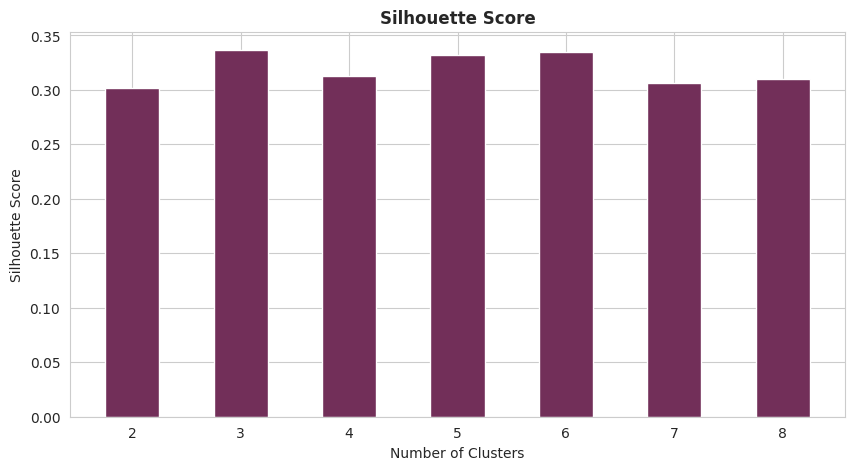

In [ ]:
from sklearn.metrics import silhouette_score, silhouette_samples, calinski_harabasz_score, davies_bouldin_score
from sklearn.model_selection import ParameterGrid
from sklearn import cluster

parameters = [i for i in range(2, 9)]
# instantiating ParameterGrid, pass number of clusters as input
parameter_grid = ParameterGrid({'n_clusters': parameters})
best_score = -1
clf = cluster.KMeans(
            max_iter=10,
            init='k-means++',
            n_init=1)     # instantiating KMeans model
silhouette_scores = []
# evaluation based on silhouette_score
for p in parameter_grid:
    clf.set_params(**p)    # set current hyper parameter
    clf.fit(PCA_result)
    ss = silhouette_score(PCA_result, clf.labels_)   # calculate silhouette_score
    silhouette_scores += [ss]       # store all the scores
    print('Parameter:', p, 'Score', ss)
    # check p which has the best score
    if ss > best_score:
        best_score = ss
        best_grid = p


# plotting silhouette score
plt.figure(figsize=(10, 5))
plt.bar(range(len(silhouette_scores)), list(silhouette_scores), align='center', color='#722f59', width=0.5)
plt.xticks(range(len(silhouette_scores)), list(parameters))
plt.title('Silhouette Score', fontweight='bold')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')  # Add y-axis label
plt.show()

In [ ]:
N = 3
clf = cluster.KMeans(n_clusters=N,
            max_iter=100,
            init='k-means++',
            n_init=1)
labels = clf.fit_predict(PCA_result)
print(labels)

[1 2 2 2 2 2 0 2 2 1 0 2 2 2 1 2 1 0 1 0 0 2 2 1 1 1 0 2 0 0 2 2 1 1 1 0 1
 2 2 1 2 0 0 0 1 2 2 0 1 2 0 1 2 0 2 2 2 1 2 0 1 2 1 1 2 2 1 2 2 2 0 1 0 2
 1 1 1 1 1 2 1 2 0 0 1 1 1 1 0 1 2 0 2 0 1 1 0 2 2 1 1 2 2 0 2 2 0 0 0 0 0
 0 0 2 2 0 0 0 0 0 0 0 1 1 2 1 0 1 0 0 0 0 2 1 2 2 2 2 0 0 0 2 2 1 1 2 2 2
 1 2 2 1 2 0 2 0 2 0 0 1 0 1 0 1 2 2 1 0 2 2 2 1 1 2 1 1 0 1 2 1 1 2 0 0 1
 1 2 1 2 0 0 2 1 2 0 2 1 2 1 1 0 2 2 0 1 2 1 2 1 0 0 1 0 2 2 0 2 2 0 0 1 0
 0 2 1 2 1 1 2 1 0 0 1 0 0 2 0 0 2 2 0 0 1 0 1 2 1 2 0 1 0 0 2 2 2 0 0 0 2
 1 0 1 1 1 1 0 2 2 1 1 2 0 1 2 1 2 2 0 0 1 2 1 0 1 0 0 1 2 0 0 0 0 2 2 1 1
 1 2 1 0 0 1 0 2 1 0 2 2 0 0 1 2 2 2 2 0 2 0 0 1 1 0 1 1 1 2 2 2 2 0 2 2 1
 2 0 1 0 0 1 0 2 2 2 0 0 2 1 1 0 0 2 2 2 1 0 2 0 1 2 2 0 1 0 1 1 1 2 1 2 2
 2 0 0 0 2 0 2 1 1 2 1 1 1 2 1 2 0 1 2 2 0 2 2 0 0 2 2 0 0 2 2 2 1 2 1 1 2
 2 0 2 1 2 0 1 0 2 0 2 0 0 2 2 0 2 0 2 0 1 1 2 2 1 0 1 0 1 2 1 0 1 2 2 0 1
 2 1 0 2 0 1 0 1 0 2 1 2 2 0 1 1 0 1 2 1 2 2 0 1 0 1 0 1 1 2 1 0 0 2 1 1 1
 0 2 0 1 1 1 0 1 1 1 2 2 

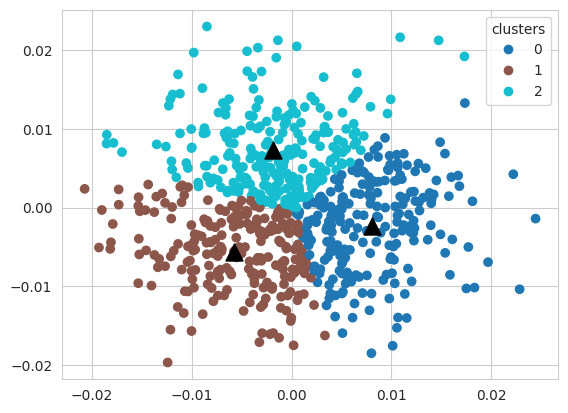

In [ ]:
label = ["#e05f14", "#e0dc14", "#2fe014"]
color = [label[i] for i in labels]
fig, ax = plt.subplots()
sc = ax.scatter(PCA_result[:, 0], PCA_result[:, 1], c=labels, cmap='tab10')
ax.legend(*sc.legend_elements(), title='clusters')

centroids = clf.cluster_centers_
centroidpoint = centroids
ax.scatter(centroidpoint[:, 0], centroidpoint[:, 1], marker='^', s=150, c='#000000')
plt.show()

In [ ]:
# fit a 2D PCA model to the vectors
vectors = weak_model.wv[weak_model.wv.key_to_index]
words = list(weak_model.wv.key_to_index.keys())
pca = PCA(n_components=2)  # Set the desired number of components (e.g., 2 for 2D visualization)
PCA_result = pca.fit_transform(vectors)

# Prepare a DataFrame
PCA_result_df = pd.DataFrame(PCA_result, columns=['x_values', 'y_values'])
PCA_result_df['word'] = words
PCA_data_complete = PCA_result_df[['word', 'x_values', 'y_values']]

Parameter: {'n_clusters': 2} Score 0.3011
Parameter: {'n_clusters': 3} Score 0.3306064
Parameter: {'n_clusters': 4} Score 0.30721658
Parameter: {'n_clusters': 5} Score 0.30971625
Parameter: {'n_clusters': 6} Score 0.3213989
Parameter: {'n_clusters': 7} Score 0.31585348
Parameter: {'n_clusters': 8} Score 0.30565152


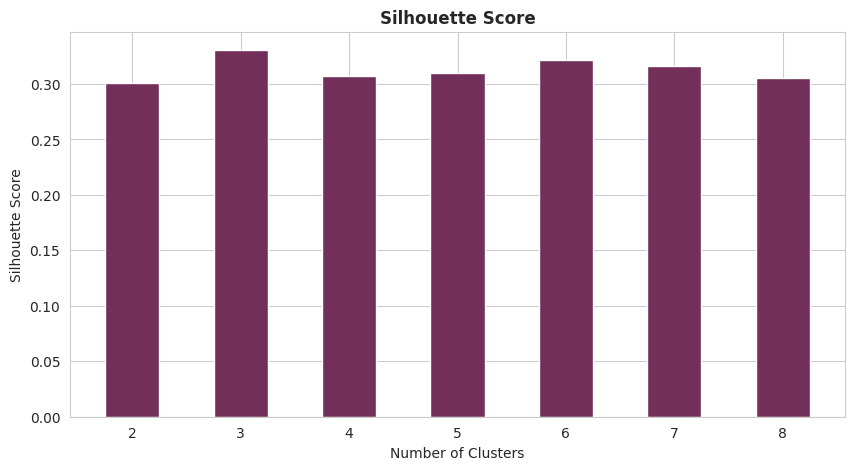

In [ ]:
parameters = [i for i in range(2, 9)]
# instantiating ParameterGrid, pass number of clusters as input
parameter_grid = ParameterGrid({'n_clusters': parameters})
best_score = -1
clf = cluster.KMeans(
            max_iter=10,
            init='k-means++',
            n_init=1)     # instantiating KMeans model
silhouette_scores = []
# evaluation based on silhouette_score
for p in parameter_grid:
    clf.set_params(**p)    # set current hyper parameter
    clf.fit(PCA_result)
    ss = silhouette_score(PCA_result, clf.labels_)   # calculate silhouette_score
    silhouette_scores += [ss]       # store all the scores
    print('Parameter:', p, 'Score', ss)
    # check p which has the best score
    if ss > best_score:
        best_score = ss
        best_grid = p


# plotting silhouette score
plt.figure(figsize=(10, 5))
plt.bar(range(len(silhouette_scores)), list(silhouette_scores), align='center', color='#722f59', width=0.5)
plt.xticks(range(len(silhouette_scores)), list(parameters))
plt.title('Silhouette Score', fontweight='bold')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')  # Add y-axis label
plt.show()

In [ ]:
N = 3
clf = cluster.KMeans(n_clusters=N,
            max_iter=100,
            init='k-means++',
            n_init=1)
labels = clf.fit_predict(PCA_result)

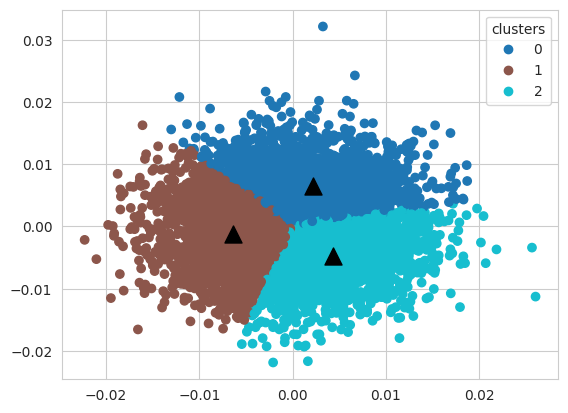

In [ ]:
label = ["#e05f14", "#e0dc14", "#2fe014"]
color = [label[i] for i in labels]
fig, ax = plt.subplots()
sc = ax.scatter(PCA_result[:, 0], PCA_result[:, 1], c=labels, cmap='tab10')
ax.legend(*sc.legend_elements(), title='clusters')

centroids = clf.cluster_centers_
centroidpoint = centroids
ax.scatter(centroidpoint[:, 0], centroidpoint[:, 1], marker='^', s=150, c='#000000')
plt.show()

In [ ]:
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from tqdm import tqdm
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(min_df=5)

def create_WordCloud(data, title=None):
    data_vectorized = vectorizer.fit_transform(tqdm(data))
    word_count = pd.DataFrame({'word': vectorizer.get_feature_names_out(), 'count': np.asarray(data_vectorized.sum(axis=0))[0]})
    word_count = word_count.sort_values('count', ascending=False).sort_values('count', ascending=False)

    text = []
    for i in word_count.values:
        string = [i[0]] * i[1]
        string = " ".join(string)
        text.append(string)

    wordcloud = WordCloud(width = 500, height = 500,
                          background_color ='white',
                          min_font_size = 15,
                          collocations=False
                         ).generate(" ".join(text))

    plt.figure(figsize = (5, 5), facecolor = None)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.tight_layout(pad = 0)
    plt.title(title,fontsize=20)
    plt.show()

In [ ]:
result = pd.DataFrame(columns=['Text', 'Topic'])
for i, text in enumerate(high_data['clean_text']):
    result.at[i, 'Text'] = text
    #result.at[i, 'process'] = train[i]
    result.at[i, 'Topic'] = labels[i]

100%|██████████| 54/54 [00:00<00:00, 6906.10it/s]


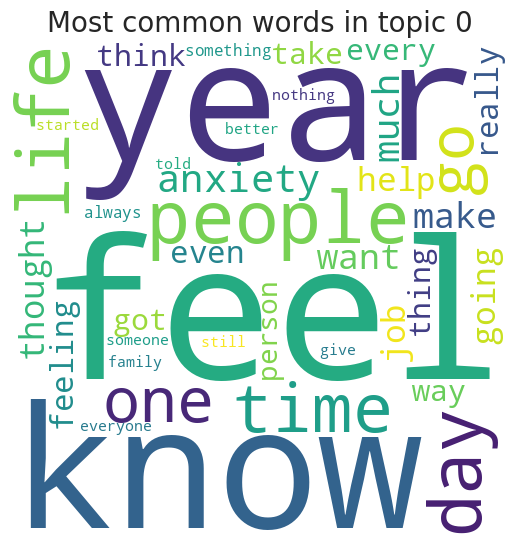

In [ ]:
create_WordCloud(result['Text'].loc[result.Topic == 0], title="Most common words in topic 0")

In [ ]:
vectorizer = CountVectorizer(min_df=5)
data_vectorized0 = vectorizer.fit_transform(tqdm(result['Text'].loc[result.Topic == 0]))

100%|██████████| 54/54 [00:00<00:00, 11065.68it/s]


<Axes: ylabel='word'>

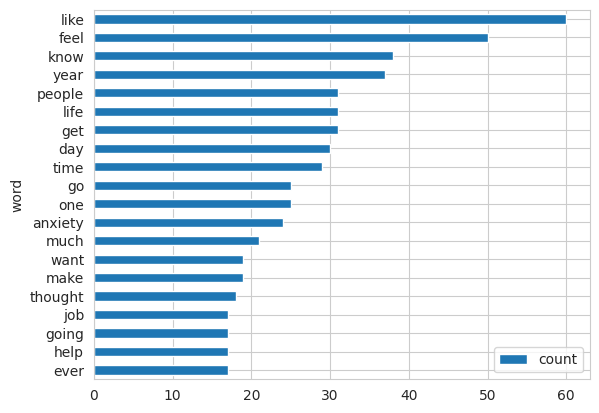

In [ ]:
word_count = pd.DataFrame({'word': vectorizer.get_feature_names_out(), 'count': np.asarray(data_vectorized0.sum(axis=0))[0]})
word_count.sort_values('count', ascending=False).set_index('word')[:20].sort_values('count', ascending=True).plot(kind='barh')

100%|██████████| 44/44 [00:00<00:00, 6831.87it/s]


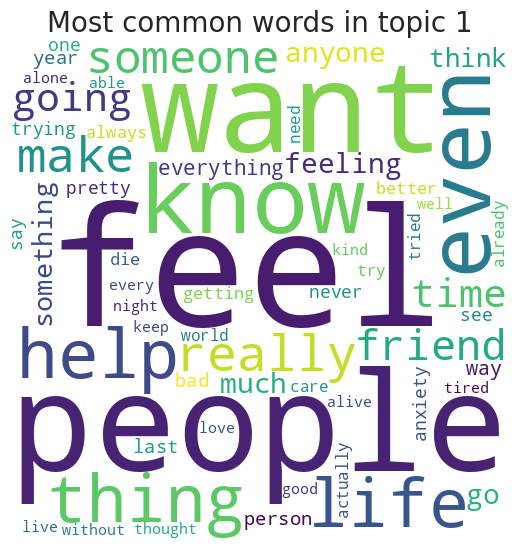

In [ ]:
create_WordCloud(result['Text'].loc[result.Topic == 1], title="Most common words in topic 1")

100%|██████████| 44/44 [00:00<00:00, 9478.17it/s]


<Axes: ylabel='word'>

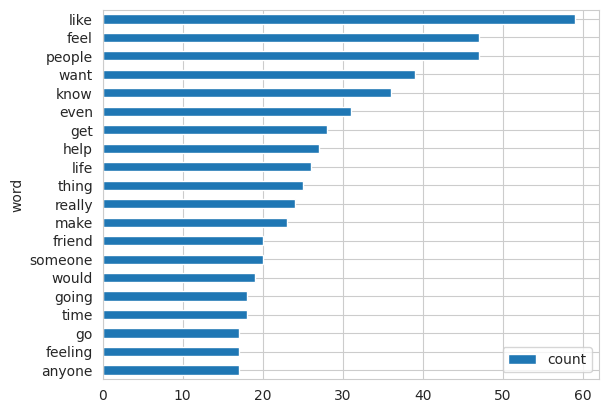

In [ ]:
data_vectorized1 = vectorizer.fit_transform(tqdm(result['Text'].loc[result.Topic == 1]))
word_count = pd.DataFrame({'word': vectorizer.get_feature_names_out(), 'count': np.asarray(data_vectorized1.sum(axis=0))[0]})

word_count.sort_values('count', ascending=False).set_index('word')[:20].sort_values('count', ascending=True).plot(kind='barh')

100%|██████████| 85/85 [00:00<00:00, 12680.63it/s]


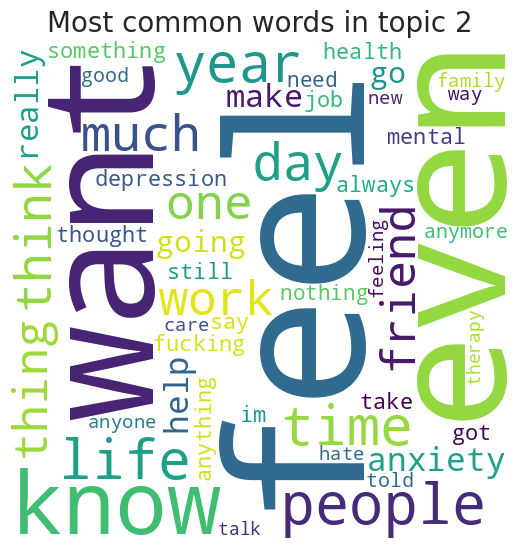

In [ ]:
create_WordCloud(result['Text'].loc[result.Topic == 2], title="Most common words in topic 2")

100%|██████████| 85/85 [00:00<00:00, 7141.74it/s]


<Axes: ylabel='word'>

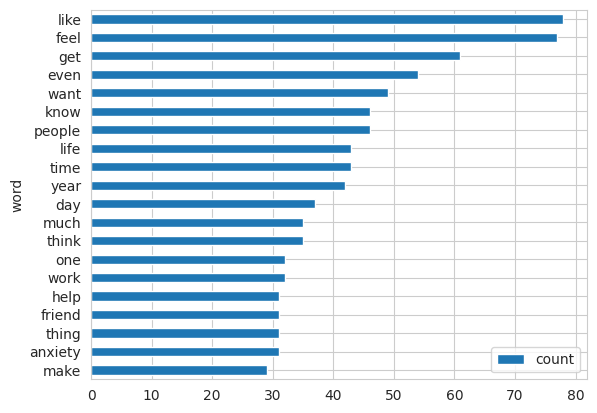

In [ ]:
data_vectorized2 = vectorizer.fit_transform(tqdm(result['Text'].loc[result.Topic == 2]))
word_count = pd.DataFrame({'word': vectorizer.get_feature_names_out(), 'count': np.asarray(data_vectorized2.sum(axis=0))[0]})

word_count.sort_values('count', ascending=False).set_index('word')[:20].sort_values('count', ascending=True).plot(kind='barh')

In [ ]:
!pip install pyLDAvis
!pip install pyLDAvis.gensim
!pip install git+https://github.com/bmabey/pyLDAvis.git@master#egg=pyLDAvis


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


ERROR: Could not find a version that satisfies the requirement pyLDAvis.gensim (from versions: none)
ERROR: No matching distribution found for pyLDAvis.gensim
  Cloning https://github.com/bmabey/pyLDAvis.git (to revision master) to /tmp/pip-install-acf5yv36/pyldavis_47abf8fa9f57445b8907962d8b5b4012
  Running command git clone --filter=blob:none --quiet https://github.com/bmabey/pyLDAvis.git /tmp/pip-install-acf5yv36/pyldavis_47abf8fa9f57445b8907962d8b5b4012
  Resolved https://github.com/bmabey/pyLDAvis.git to commit 772a55a7bdd8604d60933ca93cd7a147eb75c513
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done


In [ ]:
import gensim
import gensim
import pyLDAvis
import pyLDAvis.gensim_models
from gensim.models.coherencemodel import CoherenceModel
import gensim.corpora as corpora
from gensim import models

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
token_text = high_data['clean_text'].apply(lambda msg: word_tokenize(msg))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
bigram = gensim.models.Phrases(token_text, min_count=5, threshold=100)
trigram = gensim.models.Phrases(bigram[token_text], threshold=100)
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

def process_words(texts):
    """Remove Stopwords, Form Bigrams, Trigrams and Lemmatization"""
    texts = [bigram_mod[doc] for doc in texts]
    texts = [trigram_mod[bigram_mod[doc]] for doc in texts]
    return texts

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
flag = process_words(token_text)
print(flag)

[['understand', 'people', 'reply', 'immediately', 'op', 'invitation', 'talk', 'privately', 'mean', 'help', 'type', 'response', 'usually', 'lead', 'either', 'disappointment', 'disaster', 'usually', 'work', 'quite', 'differently', 'say', 'pm', 'anytime', 'casual', 'social', 'context', 'huge', 'admiration', 'appreciation', 'goodwill', 'good', 'citizenship', 'many', 'support', 'others', 'flag', 'inappropriate', 'content', 'even', 'know', 'many', 'struggling', 'hard', 'work', 'behind', 'scene', 'information', 'resource', 'make', 'easier', 'give', 'get', 'quality', 'help', 'small', 'start', 'new', 'wiki', 'page', 'explains', 'detail', 'much', 'better', 'respond', 'public', 'comment', 'least', 'gotten', 'know', 'someone', 'maintained', 'r', 'depression', 'wiki', 'private', 'contact', 'full', 'text', 'current', 'version', 'summary', 'anyone', 'acting', 'helper', 'invite', 'accepts', 'private', 'contact', 'e', 'pm', 'chat', 'kind', 'offsite', 'communication', 'early', 'conversion', 'showing', '

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
id2word = corpora.Dictionary(flag)
texts = flag
corpus = [id2word.doc2bow(text) for text in texts]

print(corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 2), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 2), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 2), (19, 2), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 2), (27, 1), (28, 1), (29, 1), (30, 2), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 2), (41, 1), (42, 3), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 3), (49, 1), (50, 1), (51, 1), (52, 1), (53, 1), (54, 2), (55, 1), (56, 1), (57, 1), (58, 3), (59, 2), (60, 2), (61, 1), (62, 2), (63, 1), (64, 1), (65, 1), (66, 1), (67, 1), (68, 1), (69, 1), (70, 1), (71, 3), (72, 1), (73, 1), (74, 1), (75, 1), (76, 2), (77, 1), (78, 1), (79, 1), (80, 1), (81, 1), (82, 1), (83, 1), (84, 1), (85, 1), (86, 1), (87, 1), (88, 1), (89, 1), (90, 1), (91, 1), (92, 1), (93, 2), (94, 3), (95, 4), (96, 1), (97, 1), (98, 1), (99, 1), (100, 1), (101, 1), (102, 2), (103, 5), (104, 6), (105, 1), (106, 2), (107, 2), (108, 1), (109, 1), (110, 1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Remove some words
tfidf = models.TfidfModel(corpus, id2word=id2word)

low_value = 0.05
words = []
words_missing_in_tfidf = []
for i in range(len(corpus)):
  bow = corpus[i]
  low_value_words = []
  tfidf_ids = [id for id, value in tfidf[bow]]
  bow_ids = [id for id, value in bow]
  low_value_words = [id for id, value in tfidf[bow] if value < low_value]
  drops = low_value_words+words_missing_in_tfidf
  for item in drops:
      words.append(id2word[item])
  words_missing_in_tfidf = [id for id in bow_ids if id not in tfidf_ids]

  new_bow = [b for b in bow if b[0] not in low_value_words and b[0] not in words_missing_in_tfidf]
  corpus[i] = new_bow

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
def calc_lda_coherence_values(dictionary, corpus, texts, limit=12, start=1, step=1):
    coherence_values = []
    model_list = []

    for num_topics in range(start, limit, step):
        model = gensim.models.LdaMulticore(corpus=corpus, id2word=dictionary, num_topics=num_topics, alpha=0.01, eta=0.1)
        model_list.append(model)
        print('model created')
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        print(coherencemodel.get_coherence())
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

model_list, coherence_values = calc_lda_coherence_values(dictionary=id2word, corpus=corpus, texts=texts, start=1, limit=10, step=1)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


model created


0.31963310008507334
model created


0.3015119339630027
model created


0.2930086585544424
model created
0.30151681507055905


model created


0.282781024476886
model created


0.2842014822672038
model created


0.2757407147135528
model created
0.2700396417402997


model created
0.2691879130222287


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


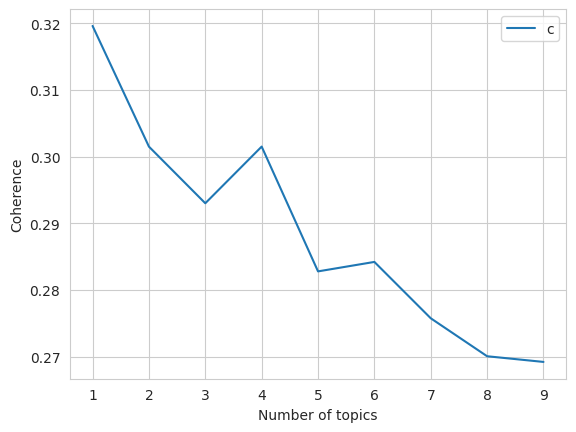

In [ ]:
limit, start, step = 10, 1, 1
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Number of topics")
plt.ylabel("Coherence")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [ ]:
from tabulate import tabulate
# Create a table with the values
table = [["Number of topics", "Coherence"]]
for i, (num_topics, coherence) in enumerate(zip(range(start, limit, step), coherence_values)):
    table.append([num_topics, coherence])

# Print the table
print(tabulate(table, headers="firstrow", tablefmt="fancy_grid"))

╒════════════════════╤═════════════╕
│   Number of topics │   Coherence │
╞════════════════════╪═════════════╡
│                  1 │    0.319633 │
├────────────────────┼─────────────┤
│                  2 │    0.301512 │
├────────────────────┼─────────────┤
│                  3 │    0.293009 │
├────────────────────┼─────────────┤
│                  4 │    0.301517 │
├────────────────────┼─────────────┤
│                  5 │    0.282781 │
├────────────────────┼─────────────┤
│                  6 │    0.284201 │
├────────────────────┼─────────────┤
│                  7 │    0.275741 │
├────────────────────┼─────────────┤
│                  8 │    0.27004  │
├────────────────────┼─────────────┤
│                  9 │    0.269188 │
╘════════════════════╧═════════════╛


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
index = coherence_values.index(max(coherence_values))
model_list[2].show_topics()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.017*"like" + 0.014*"feel" + 0.009*"year" + 0.008*"get" + 0.007*"day" + 0.007*"anxiety" + 0.007*"people" + 0.006*"want" + 0.006*"help" + 0.006*"thought"'),
 (1,
  '0.011*"people" + 0.010*"like" + 0.009*"feel" + 0.008*"life" + 0.007*"want" + 0.007*"know" + 0.006*"thing" + 0.006*"would" + 0.005*"suicide" + 0.005*"im"'),
 (2,
  '0.009*"people" + 0.009*"get" + 0.006*"even" + 0.006*"depression" + 0.006*"year" + 0.006*"friend" + 0.006*"time" + 0.005*"life" + 0.005*"help" + 0.005*"anxiety"')]

Topik 0 ->  terkait dengan perasaan dan pengalaman emosional, seperti keinginan, perasaan, dan dampak pada kehidupan sehari-hari.

topik 1 ->  terkait dengan hubungan sosial, pekerjaan, dan perasaan individu terhadap kehidupan dan kegelisahan.

topik 2 -> Topik ini mungkin mencakup kata-kata terkait bantuan, keinginan untuk membantu, dan mungkin juga mengekspresikan frustrasi atau emosi kuat.